# 3. Time Series

Time series are possibly the simplest matplotlib visualizations. Although time series are expressive and intuitive visualizations to follow, extracting meaning from them requires interpretation. Multiplex's time series make it easier to highlight the story you want to convey through the plot.

In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys

path = sys.path[0]
path = os.path.join(path, "..")
if path not in sys.path:
    sys.path.insert(1, path)

Data can be very simple, and visualizations can be too. If you're in a rush or creating visualizations to explore the data, you need only choose the style and pipe in the data.

In the first example, we first load data that shows the deviation of temperatures from the mean over the years. The data is quite self-explanatory, so the visualization does not need to be encumbered by needless information. Therefore all we do is load a style, pipe in the data, and give the visualization a title and description.

In [2]:
df = pd.read_csv('data/global_temperatures.csv')
df.sort_values('Year', inplace=True)
df = df[df['Source'] == 'GISTEMP']
df

,Source,Year,Mean
273,GISTEMP,1880,-0.20
271,GISTEMP,1881,-0.12
269,GISTEMP,1882,-0.10
267,GISTEMP,1883,-0.21
265,GISTEMP,1884,-0.28
...,...,...,...
9,GISTEMP,2012,0.63
7,GISTEMP,2013,0.65
5,GISTEMP,2014,0.74
3,GISTEMP,2015,0.87


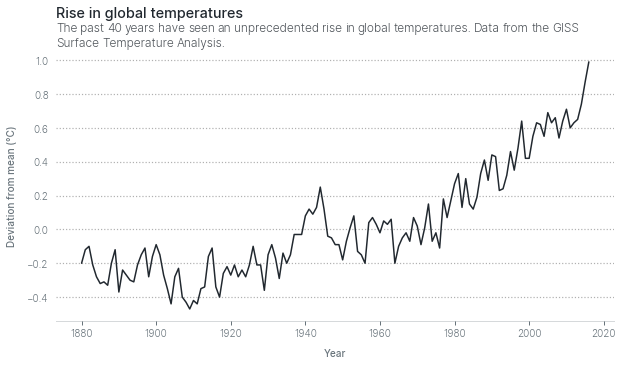

In [3]:
from multiplex import drawable
drawable = importlib.reload(drawable)
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "modern.style"))

figure = plt.figure(figsize=(10, 5))
viz = drawable.Drawable(figure)
viz.draw_time_series(df.Year.to_list(), df.Mean.to_list())

viz.set_xlabel('Year')
viz.set_ylabel('Deviation from mean (°C)')

viz.set_title('Rise in global temperatures', loc='left')
viz.set_caption('The past 40 years have seen an unprecedented rise in global temperatures. Data from the GISS Surface Temperature Analysis.')
plt.savefig('exports/3-temperatures.png', dpi=300, bbox_inches='tight')

Data can be much more complex than that. Next, we follow a simple running example: Leicester City FC footballer Jamie Vardy's record-breaking goalscoring run in the 2015/2016 season of the English Premier League.

First, we read the data from the data files. The Premier League season is split into 38 matches, or matchdays. The file contains data about three players: Leicester FC's Jamie Vardy, Tottenham Hotspur's Harry Kane, and Manchester City's Sergio Agüero. The data contains the cumulative number of goals over these matchdays for each player.

In [4]:
df = pd.read_csv('data/top_scorers.csv')
df.index = df['Matchday']
df.drop('Matchday', axis=1, inplace=True)
df.loc[0] = [0, 0, 0]
df.sort_index(inplace=True)
df.tail()

,Kane,Vardy,Aguero
Matchday,,,
34,24,22,22
35,24,22,23
36,25,22,23
37,25,24,24
38,25,24,24


Next, we plot the time series. Plotting it is very similar to how you would plot any other time series in matplotlib. The difference is that all calls are made on the `Drawable` through the `draw_time_series` method.

Multiple's time series offers more functionality. For example, it does not favor legends. Instead, line labels are drawn at the end of the time series. That way, you can read the plot as you read the data, rather than keep switching between reading the data and interpreting it with the legend.

Labels can be styled by passing on the `label_style` dictionary. Any parameter accepted by matplotlib's Text can also be passed. Multiplex uses color association to make it easier to read the time series—by default, the label will use the same color as the time series plot.

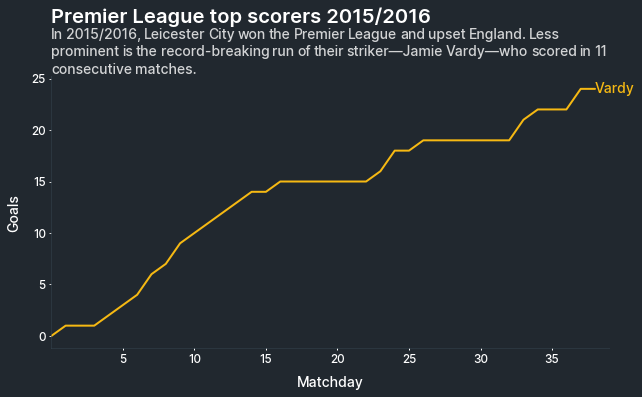

In [5]:
from multiplex import drawable
drawable = importlib.reload(drawable)
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "multiplex-dark.style"))

figure = plt.figure(figsize=(10, 5))
viz = drawable.Drawable(figure)
viz.draw_time_series(df.index.to_list(), df.Vardy.to_list(),
                     color='#F6B913', linewidth=2,
                     label='Vardy', label_style={ 'fontweight': '500' })

viz.set_xlim(0, 39)
viz.set_xticks(range(5, 38, 5))
viz.set_xlabel('Matchday')
viz.set_ylabel('Goals')

viz.set_title('Premier League top scorers 2015/2016', loc='left')
viz.set_caption('In 2015/2016, Leicester City won the Premier League and upset England. Less prominent is the record-breaking run of their striker—Jamie Vardy—who scored in 11 consecutive matches.')
plt.show()

More time series can be added to the plot by calling the same function. Multiplex automatically distributes overlapping labels.

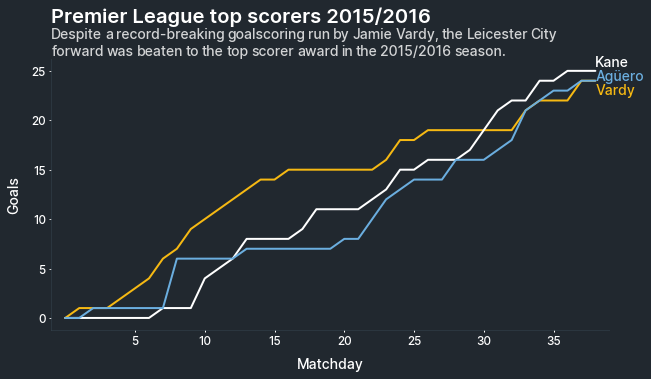

In [6]:
from multiplex import drawable
drawable = importlib.reload(drawable)

figure = plt.figure(figsize=(10, 5))
viz = drawable.Drawable(figure)
viz.draw_time_series(df.index.to_list(), df.Vardy.to_list(),
                     color='#F6B913', linewidth=2,
                     label='Vardy', label_style={ 'fontweight': '500' })
viz.draw_time_series(df.index.to_list(), df.Kane.to_list(),
                     color='#FFFFFF', linewidth=2,
                     label='Kane', label_style={ 'fontweight': '500' })
viz.draw_time_series(df.index.to_list(), df.Aguero.to_list(),
                     color='#6BAEDF', linewidth=2,
                     label='Agüero', label_style={ 'fontweight': '500' })

viz.set_xlim(-1, 39)
viz.set_xticks(range(5, 38, 5))
viz.set_xlabel('Matchday')
viz.set_ylabel('Goals')

viz.set_title('Premier League top scorers 2015/2016', loc='left')
viz.set_caption('Despite a record-breaking goalscoring run by Jamie Vardy, the Leicester City forward was beaten to the top scorer award in the 2015/2016 season.')
plt.savefig('exports/3-overlapping-labels.png', dpi=300, bbox_inches='tight')

A time series on its own does not tell the entire story. At best, it invites readers to interpret it. How, then, do you tell a story with a time series? The visualization's description is slightly too detached from the time series, and it doesn't make sense to overburden it with text.

Multiplex allows you to annotate certain points on the time series using the `annotations` argument. Annotations can be styled as follows:

- Annotation markers can be styled using the `marker_style` parameter;
- The text itself can be styled using the `annotation_style` parameter

Annotations can also be styled invidivually by providing a dictionary instead of a string annotation. The annotation must have a `text` key and, optionally, `marker_style` and `annotation_style` keys to override the general styles.

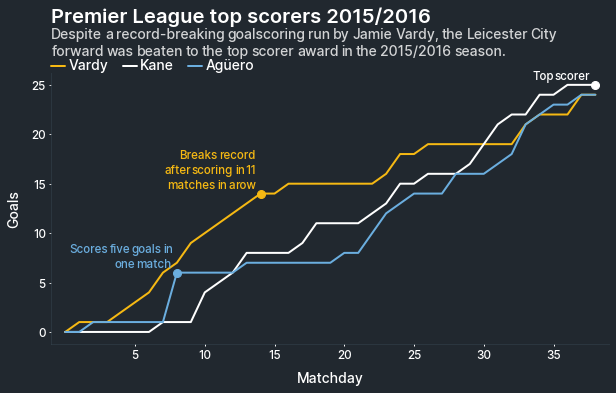

In [7]:
from multiplex import drawable
drawable = importlib.reload(drawable)

figure = plt.figure(figsize=(10, 5))
viz = drawable.Drawable(figure)

"""
Draw the time series one by one.
"""
for i in range(1):
    viz.draw_time_series(df.index.to_list(), df.Vardy.to_list(),
                         color='#F6B913', linewidth=2, with_legend=True,
                         label='Vardy', label_style={ 'fontweight': '500' })
    viz.draw_time_series(df.index.to_list(), df.Kane.to_list(),
                         color='#FFFFFF', linewidth=2, with_legend=True,
                         label='Kane', label_style={ 'fontweight': '500' })
    viz.draw_time_series(df.index.to_list(), df.Aguero.to_list(),
                         color='#6BAEDF', linewidth=2, with_legend=True,
                         label='Agüero', label_style={ 'fontweight': '500' })

"""
Add the annotations.
"""
annotation_style = { 'fontsize': 'small', 'va': 'bottom', 'align': 'right', 'pad': 0.25 }
viz.annotate('Breaks record after scoring in 11 matches in a row', (6, 14), 14,
             color='#F6B913', marker={ 'marker': 'o', 'markersize': 8 }, **annotation_style)
viz.annotate('Scores five goals in one match', (0, 8), 6,
             color='#6BAEDF', marker={ 'marker': 'o', 'markersize': 8 }, **annotation_style)
viz.annotate('Top scorer', (30, 38), 25,
             color='#FFFFFF', marker={ 'marker': 'o', 'markersize': 8 }, **annotation_style)

viz.set_xlim(-1, 39)
viz.set_xticks(range(5, 38, 5))
viz.set_xlabel('Matchday')
viz.set_ylabel('Goals')

viz.set_title('Premier League top scorers 2015/2016', loc='left')
viz.set_caption('Despite a record-breaking goalscoring run by Jamie Vardy, the Leicester City forward was beaten to the top scorer award in the 2015/2016 season.')
plt.savefig('exports/3-time-series.png', dpi=300, bbox_inches='tight')

You can learn more about time series visualizations, including functionality that was not covered in this tutorial, on [Multiplex's documentation site](https://nicholasmamo.github.io/multiplex-plot/timeseries.html).